In [8]:
# Import the necessary libraries
import sys
import os
PROJ_DIR = os.path.realpath(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.join(PROJ_DIR,'src'))
import xai_faithfulness_experiments_lib_edits as fl
import numpy as np

def get_qmeans_inv_from_file(filename):
    # Load data
    data = fl.load_generated_data(os.path.join(PROJ_DIR, 'results', filename))
    return data['qmean_invs']

def get_all_qmeans_inv_for_dataset(dataset_name):
    result = None
    for f in os.listdir(os.path.join(PROJ_DIR, 'results')):
        if f.startswith(dataset_name) and f.endswith('0_measures.npz'):
            print(f)
            file_contents = get_qmeans_inv_from_file(f)
            result = file_contents if result is None else  np.vstack((result, file_contents))
    return result

qinvs_avila = get_all_qmeans_inv_for_dataset('avila')
qinvs_glass = get_all_qmeans_inv_for_dataset('glass')

avila_40_measures.npz
avila_50_measures.npz
avila_20_measures.npz
avila_30_measures.npz
avila_10_measures.npz
glass_30_measures.npz
glass_40_measures.npz
glass_50_measures.npz
glass_20_measures.npz
glass_10_measures.npz


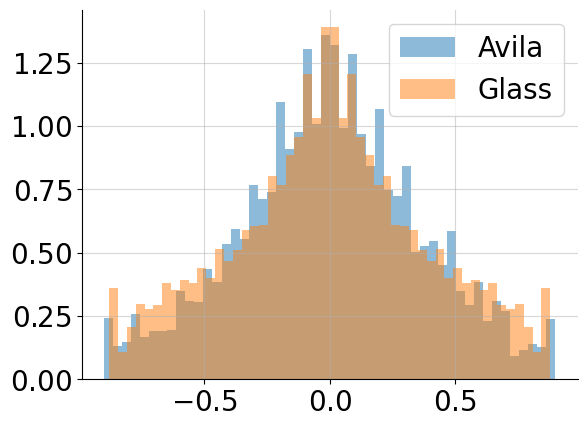

In [12]:
from matplotlib import pyplot as plt
import plt_configs

plt.hist(qinvs_avila, bins=50, density=True, alpha=0.5, label='Avila')
plt.hist(qinvs_glass, bins=50, density=True, alpha=0.5, label='Glass')
plt.legend()
plt.show()